# Week 4 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [3]:
no_games = 4

## Functions

In [4]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [5]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [6]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [7]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [8]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [9]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [10]:
print(offense.shape)
offense.head()

(488, 33)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
0,Alvin Kamara,NOR,RB,25,4,3,0,0,0,0,0,50,236,11.20,4,35,30,321,17.00,3,0,0,7,0,0,112.70,1,1,97.70,18.70,29.40,31.70,17.9
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3
3,Aaron Jones,GNB,RB,26,4,4,0,0,0,0,0,65,374,12.50,4,23,15,135,9.00,2,1,0,6,0,0,94.40,2,4,86.90,13.60,41.60,14.60,17.1
4,Dalvin Cook,MIN,RB,25,4,4,0,0,0,0,0,75,424,11.50,6,11,7,40,12.10,0,1,1,6,3,0,89.90,3,5,86.40,20.80,15.10,23.90,26.6


In [14]:
print(defense.shape)
defense.head(10)

(32, 37)


,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
0,Indianapolis Colts,56,213,4.40,945,86,308,3.60,1,117,5.00,73,9.60,637,5,8,5,62.50,7,7,0,10,52.00,4.00,15.00,26.00,7.00,14.00,236.25,21.50,77.00,29.25,18.25,0.62,159.25,2.50,13.00
1,Pittsburgh Steelers,58,183,4.80,870,61,162,2.70,1,107,5.80,64,12.80,708,6,9,4,44.40,5,4,1,15,38.00,8.00,13.00,7.00,10.00,14.50,217.50,15.25,40.50,26.75,16.00,0.60,177.00,3.75,9.50
2,Kansas City Chiefs,70,264,5.40,1424,122,644,5.30,3,130,5.50,77,11.10,780,4,13,7,53.80,7,5,2,12,39.00,7.00,5.00,7.00,20.00,17.50,356.00,30.50,161.00,32.50,19.25,0.59,195.00,3.00,9.75
3,San Francisco 49ers,71,248,4.80,1179,108,443,4.10,3,132,5.30,82,9.50,736,3,6,3,50.00,5,3,2,8,27.00,4.00,5.00,12.00,6.00,17.75,294.75,27.00,110.75,33.00,20.50,0.62,184.00,2.00,6.75
4,Baltimore Ravens,73,268,5.50,1470,97,390,4.00,3,162,6.30,109,10.70,1080,6,9,7,77.80,7,2,5,9,37.00,15.00,15.00,1.00,6.00,18.25,367.50,24.25,97.50,40.50,27.25,0.67,270.00,2.25,9.25
5,Tennessee Titans,74,195,6.50,1267,86,498,5.80,3,105,7.10,68,11.90,769,7,10,8,80.00,6,4,2,4,25.00,3.00,5.00,7.00,10.00,18.50,316.75,21.50,124.50,26.25,17.00,0.65,192.25,1.00,6.25
6,Los Angeles Rams,80,262,5.40,1413,99,494,5.00,4,151,5.60,98,10.30,919,5,16,9,56.30,6,4,2,12,26.00,4.00,7.00,4.00,11.00,20.00,353.25,24.75,123.50,37.75,24.50,0.65,229.75,3.00,6.50
7,Chicago Bears,81,267,5.20,1381,110,460,4.20,4,149,5.90,84,11.50,921,3,16,6,37.50,4,3,1,8,21.00,3.00,12.00,4.00,2.00,20.25,345.25,27.50,115.00,37.25,21.00,0.56,230.25,2.00,5.25
8,Arizona Cardinals,92,255,5.70,1448,110,498,4.50,3,134,6.60,86,12.00,950,7,18,8,44.40,3,1,2,11,18.00,4.00,9.00,4.00,1.00,23.00,362.00,27.50,124.50,33.50,21.50,0.64,237.50,2.75,4.50
9,Tampa Bay Buccaneers,92,246,5.10,1248,95,257,2.70,3,137,6.60,97,11.20,991,6,13,7,53.80,8,5,3,14,36.00,0.00,14.00,16.00,6.00,23.00,312.00,23.75,64.25,34.25,24.25,0.71,247.75,3.50,9.00


In [15]:
per_week(defense, 'Ttl_Pts_Allowed', no_games)
per_week(defense, 'Ttl_Yds', no_games)
per_week(defense, 'Rushing_Att', no_games)
per_week(defense, 'Rushing_Yds', no_games)
per_week(defense, 'Passing_Att', no_games)
per_week(defense, 'Completions', no_games)
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week(defense, 'Passing_Yds', no_games)
per_week(defense, 'Sacks', no_games)
per_week(defense, 'TTL', no_games)

In [16]:
offense[offense['Player'] == 'Mark Ingram']

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
120,Mark Ingram,BAL,RB,31,4,4,0,0,0,0,0,34,148,7.50,2,5,3,25,11.30,0,0,0,2,0,0,30.80,35,,29.30,2.90,13.70,3.00,9.7


In [18]:
taken_wrt = ['Alvin Kamara', 'Aaron Jones', 'Calvin Ridley', 'Dalvin Cook', 'Ezekiel Elliott', 
             'James Robinson', 'Tyler Lockett', 'Nick Chubb', 'Josh Jacobs', 'Austin Ekeler', 'DK Metcalf', 'Tyreek Hill', 
             'Stefon Diggs', 'Christian McCaffrey', 'Kareem Hunt', 'Clyde Edwards-Helaire', 'Travis Kelce', 
             'James Conner', 'Juju Smith-Schuster', 'Robert Woods', 'Adam Thielen', 'Jonathan Taylor', 
             'Keenan Allen', 'Terry McLaurin', 'Raheem Mostert', 'Mike Evans', 'Davante Adams', 'Noah Fant', 
             'Amari Cooper', 'Tyler Higbee', 'Allen Robinson', 'Cooper Kupp', 'Michael Gallup', 'David Johnson', 
             'Julian Edelman', 'Mike Gesicki', 'Melvin Gordon', 'Darius Slayton', 'David Montgomery', 'Todd Gurley', 
             'Kenyan Drake', 'John Brown', 'CeeDee Lamb', 'Darren Waller', 'Miles Sanders', 'DJ Moore', 'Mike Davis', 
             'Devin Singletary', 'DeVantae Parker', 'T.J. Hockenson', 'Will Fuller', 'Hayden Hurst', 'Mark Andrews', 
             'J.K. Dobbins', 'Odell Beckham Jr.', 'Zach Ertz', 'Chris Godwin', 'Emmanuel Sanders', 'Jerry Jeudy', 
             'Joe Mixon', 'Jared Cook', 'DJ Chark', 'Jordan Howard', 'T.Y. Hilton', 'Evan Engram', 
             'Kenny Golladay', 'Zack Moss', 'Austin Hooper', 'George Kittle', 'A.J. Brown', 'Michael Thomas', 
             'Devonta Freeman', 'Tyler Boyd']


In [19]:
myteam_wrt = ['DeAndre Hopkins', 'Derrick Henry', 'Chris Carson', 'Robby Anderson', 'Jonnu Smith', 'Hunter Henry', 
              'Diontae Johnson', 'Julio Jones', "D'Andre Swift", 'Marquise Brown', 'Mark Ingram']

## QB Analysis

In [20]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3
5,Josh Allen,BUF,QB,24,4,4,105,148,1326,12,1,25,83,6.20,3,0,0,0,0.00,0,3,3,3,0,0,120.30,3,6,120.30,28.20,34.50,32.20,25.4
6,Patrick Mahomes,KAN,QB,25,4,4,101,150,1134,11,0,18,108,6.00,1,0,0,0,0.00,0,0,0,1,0,1,108.20,4,7,108.10,20.40,27.50,40.00,20.2
7,Kyler Murray,ARI,QB,23,4,4,99,144,919,7,5,32,265,10.80,4,0,0,0,0.00,0,1,1,4,0,0,108.30,5,8,108.20,27.30,33.10,24.70,23.1


In [22]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [23]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
1,Russell Wilson,SEA,QB,32,4,4,103,137,1285,16,2,18,95,7.80,0,0,0,0,0.00,0,1,0,0,0,1,124.90,1,2,124.90,31.80,34.40,36.80,21.9,25.75,34.25,0.75,321.25,4.00,9.38,23.75,31.23
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3,34.25,50.25,0.68,422.50,2.25,8.41,21.50,31.30
5,Josh Allen,BUF,QB,24,4,4,105,148,1326,12,1,25,83,6.20,3,0,0,0,0.00,0,3,3,3,0,0,120.30,3,6,120.30,28.20,34.50,32.20,25.4,26.25,37.00,0.71,331.50,3.00,8.96,20.75,30.07
6,Patrick Mahomes,KAN,QB,25,4,4,101,150,1134,11,0,18,108,6.00,1,0,0,0,0.00,0,0,0,1,0,1,108.20,4,7,108.10,20.40,27.50,40.00,20.2,25.25,37.50,0.67,283.50,2.75,7.56,27.00,27.02
7,Kyler Murray,ARI,QB,23,4,4,99,144,919,7,5,32,265,10.80,4,0,0,0,0.00,0,1,1,4,0,0,108.30,5,8,108.20,27.30,33.10,24.70,23.1,24.75,36.00,0.69,229.75,1.75,6.38,66.25,27.05


In [24]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,45.00,48.00,48.00,45.00,48.00,48.00
mean,28.83,3.17,2.67,62.00,92.98,694.48,4.67,2.02,11.00,48.33,7.07,0.60,0.12,0.12,0.35,0.16,0.00,1.25,0.54,0.60,0.04,0.25,52.52,52.45,12.98,13.61,13.25,17.71,26.80,0.65,197.85,1.29,7.74,13.05,14.59
std,5.44,1.08,1.63,40.87,59.85,462.91,3.96,1.82,8.94,60.23,4.12,1.09,0.49,0.49,3.45,2.18,0.00,1.39,0.92,1.09,0.20,0.48,38.00,38.01,10.40,12.12,11.03,9.35,13.62,0.14,106.91,1.00,4.89,15.52,9.09
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,-2.50,0.00
25%,24.00,2.75,1.00,21.25,36.00,229.00,1.00,0.00,5.00,3.00,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.18,11.18,0.15,0.00,0.53,13.88,21.00,0.61,142.50,0.50,6.34,1.25,7.23
50%,27.50,4.00,4.00,72.50,108.00,800.50,4.00,2.00,9.50,29.50,7.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,58.40,58.15,14.00,13.80,12.70,20.88,31.25,0.67,226.00,1.25,7.42,8.12,16.81
75%,32.00,4.00,4.00,98.00,142.50,1070.25,7.00,3.00,16.00,77.00,9.25,1.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,76.92,76.92,21.05,23.40,20.65,24.56,36.00,0.71,273.19,2.00,8.13,19.25,19.74
max,43.00,4.00,4.00,137.00,201.00,1690.00,16.00,7.00,39.00,265.00,18.80,4.00,3.00,3.00,23.00,13.70,0.00,5.00,4.00,4.00,1.00,2.00,125.20,125.20,31.80,39.80,40.00,34.25,50.25,1.00,422.50,4.00,38.00,66.25,31.30


In [25]:
quarterbacks[quarterbacks['Player'].isin(['Dak Prescott', 'Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
2,Dak Prescott,DAL,QB,27,4,4,137,201,1690,9,3,16,86,8.80,3,0,0,0,0.00,0,3,3,3,1,1,125.20,2,3,125.20,17.60,39.80,29.50,38.3,34.25,50.25,0.68,422.50,2.25,8.41,21.50,31.30
8,Aaron Rodgers,GNB,QB,37,4,4,98,139,1214,13,0,6,31,6.70,0,1,1,-6,-6.00,0,0,0,0,0,0,103.60,6,9,103.10,30.80,18.20,24.50,29.6,24.50,34.75,0.71,303.50,3.25,8.73,7.75,25.77


Avg PassingYds_pG: 210.02
Dak Prescott PassingYds_pG: 396.0
--------------------------------------------------
Avg PassingYds_pG: 210.02
Aaron Rodgers PassingYds_pG: 295.67
--------------------------------------------------


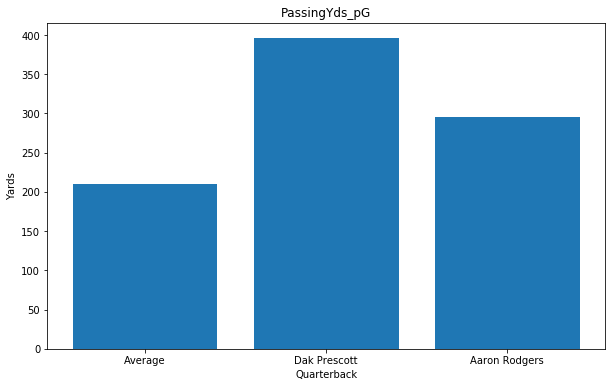

In [110]:
average, prescott, dak = print_metric(quarterbacks, 'PassingYds_pG', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', 22)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent: 0.65
Aaron Rodgers Completion_Percent: 0.67
--------------------------------------------------


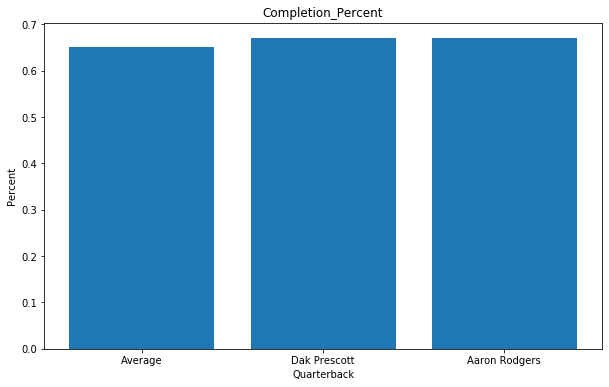

In [22]:
average, prescott, dak = print_metric(quarterbacks, 'Completion_Percent', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', 22)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Percent')

Avg TTL: 44.43
Dak Prescott TTL: 86.9
--------------------------------------------------
Avg TTL: 44.43
Aaron Rodgers TTL: 73.5
--------------------------------------------------


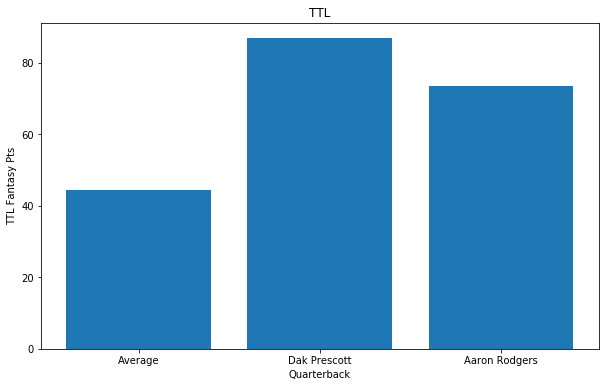

In [23]:
average, prescott, dak = print_metric(quarterbacks, 'TTL', 8)
average, rodgers, aaron = print_metric(quarterbacks, 'TTL', 22)

x = ['Average', prescott, rodgers]
y = [average, dak, aaron]

bar_plot(x, y, 'TTL', 'Quarterback', 'TTL Fantasy Pts')

Week 4 match ups:

    Dallas vs Cleveland
    Green Bay vs Atlanta

In [24]:
defense[defense['Team'].isin(['Cleveland Browns', 'Atlanta Falcons'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
23,Cleveland Browns,90,208,5.00,1043,76,282,3.70,3,124,6.60,79,10.40,824,8,13,10,76.90,7,3,4,8,18.00,0.00,4.00,14.00,30.00,347.67,25.33,94.00,41.33,26.33,0.64,274.67,2.67,6.00
30,Atlanta Falcons,111,217,6.40,1390,76,339,4.50,5,135,8.10,94,11.60,1088,9,14,11,78.60,5,2,3,6,7.00,-1.00,3.00,5.00,37.00,463.33,25.33,113.00,45.00,31.33,0.70,362.67,2.00,2.33


In [25]:
print('Prescott vs Cleveland Browns Summary:')
print('-' * 50)
print('')


print_metric(quarterbacks, 'PassesAttempted_pG', 8)
print_metric_team(defense, 'Passing_Att_pG', 23)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', 8)
print_metric_team(defense, 'Completions_pG', 23)
print('')
print_metric(quarterbacks, 'PassingYds_pG', 8)
print_metric_team(defense, 'Passing_Yds_pG', 23)
print('')
print_metric(quarterbacks, 'Completion_Percent', 8)
print_metric_team(defense, 'Completion_Percent_Allowed', 23)
print('')
print_metric(quarterbacks, 'PassingTDs', 8)
print_metric_team(defense, 'Passing_TDs', 23)


Prescott vs Cleveland Browns Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 28.33
Dak Prescott PassesAttempted_pG: 47.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Cleveland Browns Passing_Att_pG: 41.33
--------------------------------------------------

Avg CompletedPasses_pG: 18.67
Dak Prescott CompletedPasses_pG: 32.0
--------------------------------------------------
Avg Completions_pG: 23.05
Cleveland Browns Completions_pG: 26.33
--------------------------------------------------

Avg PassingYds_pG: 210.02
Dak Prescott PassingYds_pG: 396.0
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Cleveland Browns Passing_Yds_pG: 274.67
--------------------------------------------------

Avg Completion_Percent: 0.65
Dak Prescott Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Cleveland Browns Completion_Percent_Allowed: 0.64
--

(5.22, 'Cleveland Browns', 8)

In [26]:
print('Rodgers vs Atlanta Falcons Summary:')
print('-' * 50)
print('')


print_metric(quarterbacks, 'PassesAttempted_pG', 22)
print_metric_team(defense, 'Passing_Att_pG', 30)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', 22)
print_metric_team(defense, 'Completions_pG', 30)
print('')
print_metric(quarterbacks, 'PassingYds_pG', 22)
print_metric_team(defense, 'Passing_Yds_pG', 30)
print('')
print_metric(quarterbacks, 'Completion_Percent', 22)
print_metric_team(defense, 'Completion_Percent_Allowed', 30)
print('')
print_metric(quarterbacks, 'PassingTDs', 22)
print_metric_team(defense, 'Passing_TDs', 30)


Rodgers vs Atlanta Falcons Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 28.33
Aaron Rodgers PassesAttempted_pG: 35.33
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Atlanta Falcons Passing_Att_pG: 45.0
--------------------------------------------------

Avg CompletedPasses_pG: 18.67
Aaron Rodgers CompletedPasses_pG: 23.67
--------------------------------------------------
Avg Completions_pG: 23.05
Atlanta Falcons Completions_pG: 31.33
--------------------------------------------------

Avg PassingYds_pG: 210.02
Aaron Rodgers PassingYds_pG: 295.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Atlanta Falcons Passing_Yds_pG: 362.67
--------------------------------------------------

Avg Completion_Percent: 0.65
Aaron Rodgers Completion_Percent: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Atlanta Falcons Completion_Percent_Allowed: 0.7
----

(5.22, 'Atlanta Falcons', 9)

This decision is a bit more complicated. Dallas is going up against a tougher defense with the Browns, but he's still outperforming what the Browns have so far allowed. Last week Prescott threw an impressive 472 yards, now averaging 396 on the season. The Browns have so far allowed 275 passing yards on average. Prescott seems to be a bigger part of the Dallas offense compared to Rodgesr who has attempted 35 passes in a game on average versus Prescott who has attempted nearly 48 passes. Both have a completion rate of 67%.

The interesting part is the Atlanta Falcons. The Falcons have allowed an average 363 passing yards so far this season. Quarterbacks have completed 70% of their passes. If I was deciding on Green Bay's strategy, I would definitely be putting the ball in the quarterback's hands. I'm tempted to take a bet that that's exactly what they'll do and Rodgers will outperform his projected 20.89 points. That's if I'm a betting person.

## Runningbacks

In [27]:
runningbacks = offense[offense['Position'] == 'RB']

In [28]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')

In [29]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
0,Alvin Kamara,NOR,RB,25,3,2,0,0,0,0,0,31,153,13.40,3,31,27,285,15.60,3,0,0,6,0,0,93.30,1,1,79.80,18.70,29.40,31.70,10.33,51.00,10.33,9.00
2,Aaron Jones,GNB,RB,26,3,3,0,0,0,0,0,50,303,6.60,4,18,10,95,14.00,1,1,0,5,0,0,74.80,2,3,69.80,13.60,41.60,14.60,16.67,101.00,6.00,3.33
5,Dalvin Cook,MIN,RB,25,3,3,0,0,0,0,0,48,294,7.30,4,9,5,24,12.00,0,1,1,4,3,0,62.30,3,6,59.80,20.80,15.10,23.90,16.00,98.00,3.00,1.67
9,Nick Chubb,CLE,RB,25,3,3,0,0,0,0,0,51,292,12.30,4,3,3,17,11.70,0,1,1,4,0,0,54.40,4,10,52.90,4.60,25.30,23.00,17.00,97.33,1.00,1.00
10,Ezekiel Elliott,DAL,RB,25,3,3,0,0,0,0,0,58,219,10.80,3,23,15,88,13.70,1,2,1,4,0,0,60.20,5,11,52.70,24.70,16.20,11.80,19.33,73.00,7.67,5.00


In [30]:
myteam_rbs = ['Chris Carson', 'Derrick Henry', 'Mark Ingram', "D'Andre Swift"]
taken_rbs = ['Alvin Kamara', 'Aaron Jones', 'Dalvin Cook', 'Ezekiel Elliott', 'James Robinson', 'Nick Chubb', 
             'Josh Jacobs', 'Austin Ekeler', 'Christian McCaffrey', 'Karrem Hunt', 'Clyde Edwards-Helaire', 
             'James Conner', 'Jonathan Taylor', 'Raheem Mostert', 'David Johnson', 
             'Melvin Gordon', 'David Montgomery', 'Todd Gurley', 'Kenyan Drake', 'Miles Sanders', 
             'Mike Davis', 'J.K. Dobbins', 'Joe Mixon', 'Jordan Howard', 'Zack Moss', 'Devonta Freeman', 
             'Devin Singletary']

In [31]:
myteam_rbs = myteam_rbs + myteam_wrt
taken_rbs = taken_rbs + taken_wrt

In [32]:
runningbacks[runningbacks['Player'].isin(myteam_rbs)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
18,Derrick Henry,TEN,RB,26,3,3,0,0,0,0,0,82,319,11.90,2,8,5,26,7.00,0,0,0,2,0,0,49.00,8,19,46.50,13.10,8.40,25.00,27.33,106.33,2.67,1.67
27,Chris Carson,SEA,RB,26,3,3,0,0,0,0,0,37,157,6.40,0,12,12,93,14.50,3,0,0,3,0,0,49.00,11,28,43.00,18.60,16.80,7.60,12.33,52.33,4.00,4.00
134,Mark Ingram,BAL,RB,31,3,3,0,0,0,0,0,26,114,7.80,1,4,2,22,11.00,0,0,0,1,0,0,20.60,39,,19.60,2.90,13.70,3.00,8.67,38.00,1.33,0.67
150,D'Andre Swift,DET,RB,21,3,0,0,0,0,0,0,8,20,7.00,1,12,9,94,14.40,0,0,0,1,0,0,21.90,43,,17.40,8.30,7.20,1.90,2.67,6.67,4.00,3.00


In [33]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_rbs)]

Avg RushingAttempts_pG: 4.59
Derrick Henry RushingAttempts_pG: 27.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Chris Carson RushingAttempts_pG: 12.33
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
Mark Ingram RushingAttempts_pG: 8.67
--------------------------------------------------
Avg RushingAttempts_pG: 4.59
D'Andre Swift RushingAttempts_pG: 2.67
--------------------------------------------------


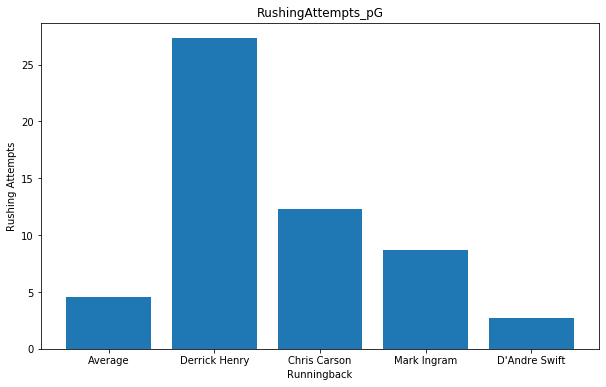

In [35]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', 18)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'RushingAttempts_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'RushingAttempts_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.98
Derrick Henry RushingYds_pG: 106.33
--------------------------------------------------
Avg RushingYds_pG: 18.98
Chris Carson RushingYds_pG: 52.33
--------------------------------------------------
Avg RushingYds_pG: 18.98
Mark Ingram RushingYds_pG: 38.0
--------------------------------------------------
Avg RushingYds_pG: 18.98
D'Andre Swift RushingYds_pG: 6.67
--------------------------------------------------


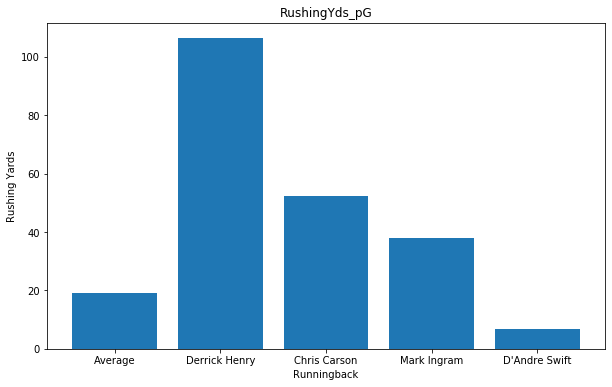

In [42]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', 18)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'RushingYds_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'RushingYds_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.59
Derrick Henry Targeted_pG: 2.67
--------------------------------------------------
Avg Targeted_pG: 1.59
Chris Carson Targeted_pG: 4.0
--------------------------------------------------
Avg Targeted_pG: 1.59
Mark Ingram Targeted_pG: 1.33
--------------------------------------------------
Avg Targeted_pG: 1.59
D'Andre Swift Targeted_pG: 4.0
--------------------------------------------------


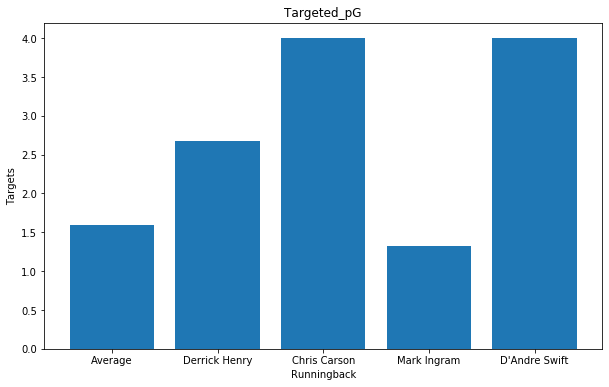

In [43]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', 18)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'Targeted_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'Targeted_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.23
Derrick Henry Receptions_pG: 1.67
--------------------------------------------------
Avg Receptions_pG: 1.23
Chris Carson Receptions_pG: 4.0
--------------------------------------------------
Avg Receptions_pG: 1.23
Mark Ingram Receptions_pG: 0.67
--------------------------------------------------
Avg Receptions_pG: 1.23
D'Andre Swift Receptions_pG: 3.0
--------------------------------------------------


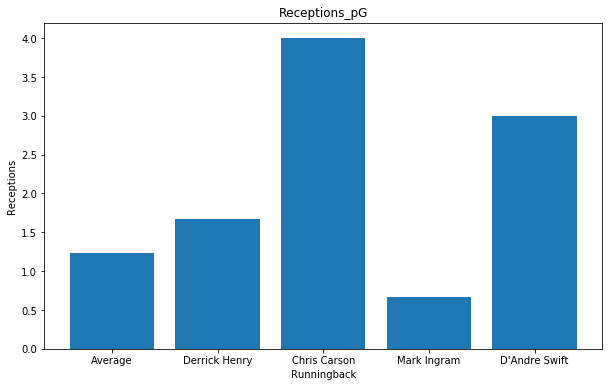

In [45]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', 18)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', 27)
average, ingram, mark = print_metric(available_rbs, 'Receptions_pG', 134)
average, swift, deandre = print_metric(available_rbs, 'Receptions_pG', 150)

x = ['Average', henry, carson, ingram, swift]
y = [average, derrick, chris, mark, deandre]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [41]:
top_availRBs = available_rbs[available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5]
print(round(available_rbs['RushingYds_pG'].mean(), 2))
top_availRBs.head(10)

18.98


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
18,Derrick Henry,TEN,RB,26,3,3,0,0,0,0,0,82,319,11.90,2,8,5,26,7.00,0,0,0,2,0,0,49.00,8,19,46.50,13.10,8.40,25.00,27.33,106.33,2.67,1.67
27,Chris Carson,SEA,RB,26,3,3,0,0,0,0,0,37,157,6.40,0,12,12,93,14.50,3,0,0,3,0,0,49.00,11,28,43.00,18.60,16.80,7.60,12.33,52.33,4.00,4.00
40,Jerick McKinnon,SFO,RB,28,3,1,0,0,0,0,0,20,139,15.50,2,10,6,59,17.30,1,0,0,3,0,0,40.80,16,41,37.80,10.40,13.70,13.70,6.67,46.33,3.33,2.00
44,Darrell Henderson,LAR,RB,23,3,1,0,0,0,0,0,35,201,12.40,2,6,3,46,18.30,0,0,0,2,0,0,38.20,18,45,36.70,0.60,18.10,18.00,11.67,67.00,2.00,1.00
98,Malcolm Brown,LAR,RB,27,3,0,0,0,0,0,0,36,145,4.30,2,6,3,31,13.30,0,0,0,2,0,0,31.10,25,,29.60,23.00,4.70,1.90,12.00,48.33,2.00,1.00
101,Leonard Fournette,TAM,RB,25,3,0,0,0,0,0,0,24,123,6.30,2,8,7,34,12.60,0,0,0,2,0,0,31.20,27,,27.70,1.90,23.60,2.20,8.00,41.00,2.67,2.33
102,Joshua Kelley,LAC,RB,23,3,0,0,0,0,0,0,43,167,11.80,1,4,4,58,19.00,0,1,1,1,0,0,28.50,28,,26.50,12.00,11.30,3.20,14.33,55.67,1.33,1.33
104,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,30,,25.60,9.70,1.90,14.00,8.67,57.67,1.00,0.67
105,Antonio Gibson,WAS,RB,22,3,2,0,0,0,0,0,31,140,9.20,2,7,6,16,8.70,0,1,1,2,0,0,28.60,31,,25.60,4.40,11.20,10.00,10.33,46.67,2.33,2.00
109,Adrian Peterson,DET,RB,35,3,1,0,0,0,0,0,43,209,12.60,0,4,4,31,14.50,0,0,0,0,0,0,26.00,36,,24.00,11.40,4.10,8.50,14.33,69.67,1.33,1.33


One RB I'm really interested in is Darrell Henderson (LAR). He has averaged 67 yards per game and 12 attempts per game. Last week, he rushed for 20 times and 114 yards. He's definitely stepping up in terms of being apart of the game.

I want to compare him to my active RBs for this week along with the teams that each player will be facing. Derrick Henry of the Titans will not be playing as his game is delayed due to COVID. Naturally, he's my top performer and never leaving my team and only leaving my active roster because he's not playing.

In [48]:
defense[defense['Team'].isin(['New York Giants', 'Miami Dolphins', 'New Orleans Saints', 'Washington Football Team'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
9,Miami Dolphins,66,185,6.50,1198,82,401,4.90,5,96,8.80,69,12.20,845,4,8,7,87.50,4,1,3,7,16.00,2.00,2.00,12.00,22.00,399.33,27.33,133.67,32.00,23.00,0.72,281.67,2.33,5.33
17,New York Giants,83,201,5.30,1073,97,369,3.80,3,96,7.90,64,11.90,762,6,12,8,66.70,3,2,1,8,11.00,4.00,9.00,-2.00,27.67,357.67,32.33,123.00,32.00,21.33,0.67,254.00,2.67,3.67
18,Washington Football Team,84,202,5.00,1003,86,375,4.40,4,103,6.90,66,10.80,712,5,12,7,58.30,4,3,1,13,20.00,15.00,4.00,1.00,28.00,334.33,28.67,125.00,34.33,22.00,0.64,237.33,4.33,6.67
25,New Orleans Saints,98,200,5.30,1056,87,300,3.40,3,106,7.60,72,11.20,806,8,12,10,83.30,4,2,2,7,16.00,15.00,4.00,-3.00,32.67,352.00,29.00,100.00,35.33,24.00,0.68,268.67,2.33,5.33


In [53]:
print('Carson vs Miami Dolphins Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 27)
print_metric_team(defense, 'Rushing_Att_pG', 9)
print('')
print_metric(runningbacks, 'RushingYds_pG', 27)
print_metric_team(defense, 'Rushing_Yds_pG', 9)

Carson vs Miami Dolphins Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Chris Carson RushingAttempts_pG: 12.33
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Miami Dolphins Rushing_Att_pG: 27.33
--------------------------------------------------

Avg RushingYds_pG: 29.0
Chris Carson RushingYds_pG: 52.33
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
Miami Dolphins Rushing_Yds_pG: 133.67
--------------------------------------------------


(118.23, 'Miami Dolphins', 133.67)

In [54]:
print('Ingram vs Washington Football Team Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 134)
print_metric_team(defense, 'Rushing_Att_pG', 18)
print('')
print_metric(runningbacks, 'RushingYds_pG', 134)
print_metric_team(defense, 'Rushing_Yds_pG', 18)

Ingram vs Washington Football Team Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Mark Ingram RushingAttempts_pG: 8.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Washington Football Team Rushing_Att_pG: 28.67
--------------------------------------------------

Avg RushingYds_pG: 29.0
Mark Ingram RushingYds_pG: 38.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
Washington Football Team Rushing_Yds_pG: 125.0
--------------------------------------------------


(118.23, 'Washington Football Team', 125.0)

In [55]:
print('Swift vs New Orleans Saints Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 150)
print_metric_team(defense, 'Rushing_Att_pG', 25)
print('')
print_metric(runningbacks, 'RushingYds_pG', 150)
print_metric_team(defense, 'Rushing_Yds_pG', 25)

Swift vs New Orleans Saints Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
D'Andre Swift RushingAttempts_pG: 2.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
New Orleans Saints Rushing_Att_pG: 29.0
--------------------------------------------------

Avg RushingYds_pG: 29.0
D'Andre Swift RushingYds_pG: 6.67
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
New Orleans Saints Rushing_Yds_pG: 100.0
--------------------------------------------------


(118.23, 'New Orleans Saints', 100.0)

In [56]:
print('Henderson vs New York Giants Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', 44)
print_metric_team(defense, 'Rushing_Att_pG', 17)
print('')
print_metric(runningbacks, 'RushingYds_pG', 44)
print_metric_team(defense, 'Rushing_Yds_pG', 17)

Henderson vs New York Giants Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.74
Darrell Henderson RushingAttempts_pG: 11.67
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
New York Giants Rushing_Att_pG: 32.33
--------------------------------------------------

Avg RushingYds_pG: 29.0
Darrell Henderson RushingYds_pG: 67.0
--------------------------------------------------
Avg Rushing_Yds_pG: 118.23
New York Giants Rushing_Yds_pG: 123.0
--------------------------------------------------


(118.23, 'New York Giants', 123.0)

Right away I see that Swift is underperforming, not to mention facing the Saints who have allowed fewer yards on the ground than the average. I want to swap him for Henderson.

Now the decision on who to start. Carson is a no brainer. The Dolphins have allowed the most yards on the ground out of all these teams on average. Ingram and Henderson look like they're facing similar opponents, allowing on average ~125 yards. Ingram has averaged less than 9 carries versus Henderson's nearly 12. I plan to start Henderson because he's had more yards per game than Ingram and hopefully I don't regret that.

## Tight End

In [72]:
tight_ends = offense[offense['Position'] == 'TE']

In [73]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')

In [74]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
23,Travis Kelce,KAN,TE,31,3,3,0,0,0,0,0,0,0,0.00,0,27,21,227,18.10,2,0,0,2,0,0,45.20,2,24,34.70,11.00,15.00,8.70,9.00,7.00,75.67
28,Tyler Higbee,LAR,TE,27,3,3,0,0,0,0,0,0,0,0.00,0,11,10,134,17.00,3,0,0,3,1,0,38.40,3,29,33.40,4.00,23.40,6.00,3.67,3.33,44.67
32,Noah Fant,DEN,TE,23,3,3,0,0,0,0,0,0,0,0.00,0,21,14,184,14.40,2,0,0,2,1,0,39.40,4,33,32.40,14.10,13.70,4.60,7.00,4.67,61.33
38,Mike Gesicki,MIA,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,19,12,175,19.80,2,0,0,2,0,0,35.50,5,39,29.50,3.00,19.00,7.50,6.33,4.00,58.33


In [75]:
myteam_te = ['Jonnu Smith', 'Hunter Henry']
taken_te = ['Travis Kelce', 'Noah Fant', 'Tyler Higbee', 'Mike Gesicki', 'Darren Waller', 'T.J. Hockenson', 
            'Hayden Hurst', 'Mark Andrews', 'Zack Ertz', 'Jared Cook', 'Evan Engram', 'Austin Hooper', 
            'George Kittle']

In [76]:
myteam_te = myteam_te + myteam_wrt
taken_te = taken_te + taken_wrt

In [77]:
tight_ends[tight_ends['Player'].isin(myteam_te)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
76,Hunter Henry,LAC,TE,26,3,3,0,0,0,0,0,0,0,0.00,0,23,16,206,20.80,0,0,0,0,0,0,28.60,12,77,20.60,7.30,8.30,5.00,7.67,5.33,68.67


In [81]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_te)]
available_te.head(6)

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,ReceivingYds_pG
20,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,1,21,36.10,9.60,20.40,6.10,6.67,4.33,60.33
42,Jimmy Graham,CHI,TE,34,3,3,0,0,0,0,0,0,0,0.00,0,18,10,103,13.00,3,1,0,3,0,0,33.30,6,43,28.30,8.50,1.80,18.00,6.00,3.33,34.33
55,Mo Alie-Cox,IND,TE,27,3,1,0,0,0,0,0,0,0,0.00,0,11,10,181,19.00,1,0,0,1,0,0,29.10,7,56,24.10,2.00,11.10,11.00,3.67,3.33,60.33
76,Hunter Henry,LAC,TE,26,3,3,0,0,0,0,0,0,0,0.00,0,23,16,206,20.80,0,0,0,0,0,0,28.60,12,77,20.60,7.30,8.30,5.00,7.67,5.33,68.67
125,Jordan Reed,SFO,TE,30,3,0,0,0,0,0,0,0,0,0.00,0,16,11,85,14.30,2,0,0,2,0,0,26.00,13,,20.50,1.20,17.00,2.30,5.33,3.67,28.33
128,Robert Tonyan,GNB,TE,26,3,2,0,0,0,0,0,0,0,0.00,0,8,7,75,17.10,2,0,0,2,0,0,23.00,15,,19.50,0.00,8.50,11.00,2.67,2.33,25.00


Avg Targeted_pG: 2.44
Hunter Henry Targeted_pG: 7.67
--------------------------------------------------
Avg Targeted_pG: 2.44
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 2.44
Mo Alie-Cox Targeted_pG: 3.67
--------------------------------------------------
Avg Targeted_pG: 2.44
Jordan Reed Targeted_pG: 5.33
--------------------------------------------------
Avg Targeted_pG: 2.44
Robert Tonyan Targeted_pG: 2.67
--------------------------------------------------


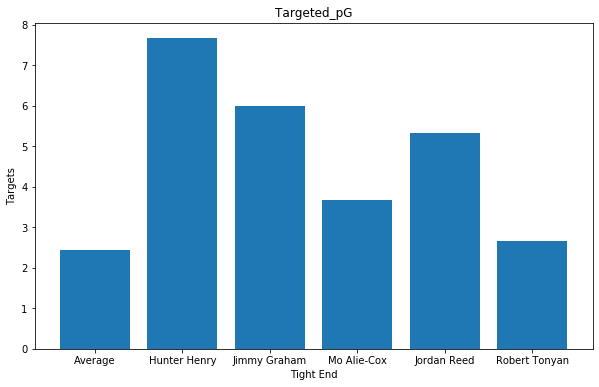

In [83]:
average, henry, hunter = print_metric(available_te, 'Targeted_pG', 76)
average, graham, jimmy = print_metric(available_te, 'Targeted_pG', 42)
average, alie_cox, mo = print_metric(available_te, 'Targeted_pG', 55)
average, reed, jordan = print_metric(available_te, 'Targeted_pG', 125)
average, tonyan, robert = print_metric(available_te, 'Targeted_pG', 128)

x = ['Average', henry, graham, alie_cox, reed, tonyan]
y = [average, hunter, jimmy, mo, jordan, robert]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.7
Hunter Henry Receptions_pG: 5.33
--------------------------------------------------
Avg Receptions_pG: 1.7
Jimmy Graham Receptions_pG: 3.33
--------------------------------------------------
Avg Receptions_pG: 1.7
Mo Alie-Cox Receptions_pG: 3.33
--------------------------------------------------
Avg Receptions_pG: 1.7
Jordan Reed Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.7
Robert Tonyan Receptions_pG: 2.33
--------------------------------------------------


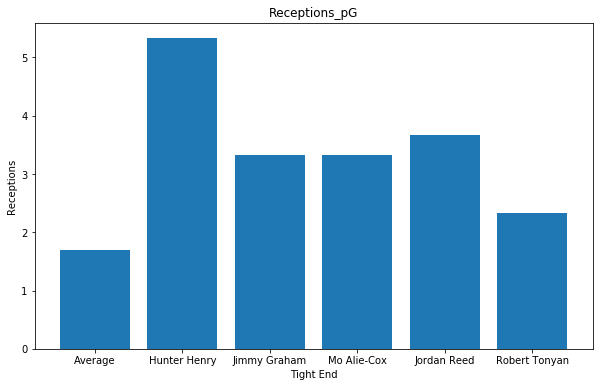

In [82]:
average, henry, hunter = print_metric(available_te, 'Receptions_pG', 76)
average, graham, jimmy = print_metric(available_te, 'Receptions_pG', 42)
average, alie_cox, mo = print_metric(available_te, 'Receptions_pG', 55)
average, reed, jordan = print_metric(available_te, 'Receptions_pG', 125)
average, tonyan, robert = print_metric(available_te, 'Receptions_pG', 128)

x = ['Average', henry, graham, alie_cox, reed, tonyan]
y = [average, hunter, jimmy, mo, jordan, robert]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

Avg ReceivingYds_pG: 17.42
Hunter Henry ReceivingYds_pG: 68.67
--------------------------------------------------
Avg ReceivingYds_pG: 17.42
Jimmy Graham ReceivingYds_pG: 34.33
--------------------------------------------------
Avg ReceivingYds_pG: 17.42
Mo Alie-Cox ReceivingYds_pG: 60.33
--------------------------------------------------
Avg ReceivingYds_pG: 17.42
Jordan Reed ReceivingYds_pG: 28.33
--------------------------------------------------
Avg ReceivingYds_pG: 17.42
Robert Tonyan ReceivingYds_pG: 25.0
--------------------------------------------------


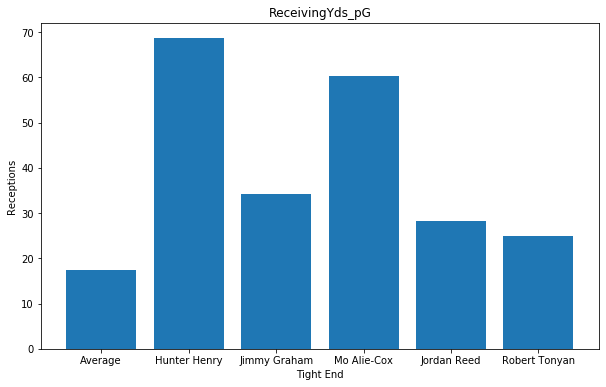

In [84]:
average, henry, hunter = print_metric(available_te, 'ReceivingYds_pG', 76)
average, graham, jimmy = print_metric(available_te, 'ReceivingYds_pG', 42)
average, alie_cox, mo = print_metric(available_te, 'ReceivingYds_pG', 55)
average, reed, jordan = print_metric(available_te, 'ReceivingYds_pG', 125)
average, tonyan, robert = print_metric(available_te, 'ReceivingYds_pG', 128)

x = ['Average', henry, graham, alie_cox, reed, tonyan]
y = [average, hunter, jimmy, mo, jordan, robert]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Receptions')

In [86]:
defense[defense['Team'].isin(['Indianapolis Colts', 'Tampa Bay Buccaneers', 'Chicago Bears'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
0,Indianapolis Colts,46,154,4.40,676,70,280,4.00,1,75,6.10,47,9.70,454,4,6,4,66.70,6,6,0,9,45.00,4.00,15.00,26.00,15.33,225.33,23.33,93.33,25.00,15.67,0.63,151.33,3.00,15.00
5,Tampa Bay Buccaneers,62,196,4.70,924,72,211,2.90,3,112,7.10,77,10.30,794,3,12,6,50.00,6,4,2,12,30.00,0.00,14.00,16.00,20.67,308.00,24.00,70.33,37.33,25.67,0.69,264.67,4.00,10.00
8,Chicago Bears,65,199,5.50,1092,72,357,5.00,4,120,6.50,68,11.40,776,2,12,5,41.70,4,3,1,7,19.00,3.00,12.00,4.00,21.67,364.00,24.00,119.00,40.00,22.67,0.57,258.67,2.33,6.33


In [89]:
print('Henry vs Tampa Bay Buccaneers Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', 76)
print_metric_team(defense, 'Passing_Att_pG', 5)
print('')
print_metric(tight_ends, 'Receptions_pG', 76)
print_metric_team(defense, 'Completions_pG', 5)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', 76)
print_metric_team(defense, 'Passing_Yds_pG', 5)

Henry vs Tampa Bay Buccaneers Summary:
--------------------------------------------------

Avg Targeted_pG: 3.06
Hunter Henry Targeted_pG: 7.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Tampa Bay Buccaneers Passing_Att_pG: 37.33
--------------------------------------------------

Avg Receptions_pG: 2.11
Hunter Henry Receptions_pG: 5.33
--------------------------------------------------
Avg Completions_pG: 23.05
Tampa Bay Buccaneers Completions_pG: 25.67
--------------------------------------------------

Avg ReceivingYds_pG: 22.29
Hunter Henry ReceivingYds_pG: 68.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Tampa Bay Buccaneers Passing_Yds_pG: 264.67
--------------------------------------------------


(258.21, 'Tampa Bay Buccaneers', 264.67)

In [90]:
print('Graham vs Indianapolis Colts Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', 42)
print_metric_team(defense, 'Passing_Att_pG', 0)
print('')
print_metric(tight_ends, 'Receptions_pG', 42)
print_metric_team(defense, 'Completions_pG', 0)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', 42)
print_metric_team(defense, 'Passing_Yds_pG', 0)

Graham vs Indianapolis Colts Summary:
--------------------------------------------------

Avg Targeted_pG: 3.06
Jimmy Graham Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Indianapolis Colts Passing_Att_pG: 25.0
--------------------------------------------------

Avg Receptions_pG: 2.11
Jimmy Graham Receptions_pG: 3.33
--------------------------------------------------
Avg Completions_pG: 23.05
Indianapolis Colts Completions_pG: 15.67
--------------------------------------------------

Avg ReceivingYds_pG: 22.29
Jimmy Graham ReceivingYds_pG: 34.33
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Indianapolis Colts Passing_Yds_pG: 151.33
--------------------------------------------------


(258.21, 'Indianapolis Colts', 151.33)

In [91]:
print('Alie-Cox vs Chicago Bears Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', 55)
print_metric_team(defense, 'Passing_Att_pG', 8)
print('')
print_metric(tight_ends, 'Receptions_pG', 55)
print_metric_team(defense, 'Completions_pG', 8)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', 55)
print_metric_team(defense, 'Passing_Yds_pG', 8)

Alie-Cox vs Chicago Bears Summary:
--------------------------------------------------

Avg Targeted_pG: 3.06
Mo Alie-Cox Targeted_pG: 3.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Chicago Bears Passing_Att_pG: 40.0
--------------------------------------------------

Avg Receptions_pG: 2.11
Mo Alie-Cox Receptions_pG: 3.33
--------------------------------------------------
Avg Completions_pG: 23.05
Chicago Bears Completions_pG: 22.67
--------------------------------------------------

Avg ReceivingYds_pG: 22.29
Mo Alie-Cox ReceivingYds_pG: 60.33
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Chicago Bears Passing_Yds_pG: 258.67
--------------------------------------------------


(258.21, 'Chicago Bears', 258.67)

I am definitely keeping Jonnu Smith of the Titans. He won't be playing this week because of COVID but he'll remain on my team.

Now let's talk Hunter Henry. Henry has been on my team since it was autodrafted. While he has been targeted an average of nearly 8 times per game, he hasn't converted that to fantasy points. He's facing Tampa Bay which has allowed 268 passing yards. Jimmy Graham has been the most prolific stepping up in week 3 with 60 receiving yards and 2 touchdowns. The Bears are facing the Colts who have allowed only 151 yards on average each week. Mo Alie-Cox hasn't been targeted in a huge way, only slightly above the average, but Alie-Cox has a near perfect completion percentage, missing only on of his targets. He's also facing the Bears who have allowed 259 in the air. I'm thinking I'll go Alie-Cox in favor of Henry and see if he can break out with the Colts.

## Wide Receiver

In [92]:
wrs = offense[offense['Position'] == 'WR']

In [121]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')

In [122]:
myteam_wr = ['DeAndre Hopkins', 'Robby Anderson', 'Diontae Johnson', 'Julio Jones', 'Marquise Brown']
taken_wr = ['Calvin Ridley', 'Tyler Lockett', 'D.K. Metcalf', 'Tyreek Hill', 'Stefon Diggs', 'JuJu Smith-Schuster', 
            'Robert Woods', 'Adam Theilen', 'Keenan Allen', 'Terry McLaurin', 'Mike Evans', 'Davante Adams', 
            'Tyler Boyd', 'Amari Cooper', 'Allen Robinson', 'Cooper Kupp', 'Michael Gallup', 'Julian Edelamn', 
            'Darius Slayton', 'John Brown', 'CeeDee Lamb', 'DJ Moore', 'DeVante Parker', 'Will Fuller', 
            'Odell Beckham Jr.', 'Chris Goodwin', 'Emmanuel Sanders', 'Jerry Jeudy', 'DJ Chark', 'T.Y. Hilton', 
            'Kenny Golladay', 'A.J. Brown', 'Michael Thomas']

In [123]:
myteam_wr = myteam_wr + myteam_wrt
taken_wr = taken_wr + taken_wrt

In [124]:
wrs[wrs['Player'].isin(myteam_wr)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG
16,DeAndre Hopkins,ARI,WR,28,3,3,0,0,0,0,0,0,0,0.00,0,37,32,356,12.30,1,0,0,1,0,0,57.60,5,17,41.60,15.10,12.80,13.70,12.33,10.67,0.86,118.67
36,Robby Anderson,CAR,WR,27,3,3,0,0,0,0,0,0,0,0.00,0,24,20,278,22.00,1,1,1,1,1,0,43.80,12,37,33.90,19.50,8.90,5.50,8.00,6.67,0.83,92.67
132,Diontae Johnson,PIT,WR,24,3,3,0,0,0,0,0,1,9,9.00,0,25,14,149,16.40,1,1,1,1,0,0,26.80,47,,19.80,3.70,15.20,0.90,8.33,4.67,0.56,49.67
143,Julio Jones,ATL,WR,31,2,2,0,0,0,0,0,0,0,0.00,0,16,11,181,20.50,0,0,0,0,0,0,23.60,53,,18.10,15.70,2.40,0.00,8.00,5.50,0.69,90.50
158,Marquise Brown,BAL,WR,23,3,2,0,0,0,0,0,0,0,0.00,0,18,12,156,13.00,0,0,0,0,0,0,21.60,62,,15.60,10.10,4.20,1.30,6.00,4.00,0.67,52.00


In [125]:
available_wrs = wrs[~wrs['Player'].isin(taken_wr)]
top_wrs = available_wrs[available_wrs['ReceivingYds_pG'] > available_wrs['ReceivingYds_pG'].mean()*1.1]
top_wrs.head(10)

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG
16,DeAndre Hopkins,ARI,WR,28,3,3,0,0,0,0,0,0,0,0.00,0,37,32,356,12.30,1,0,0,1,0,0,57.60,5,17,41.60,15.10,12.80,13.70,12.33,10.67,0.86,118.67
21,Allen Lazard,GNB,WR,25,3,3,0,0,0,0,0,2,17,13.00,0,17,13,254,24.40,2,0,0,2,0,0,45.60,7,22,39.10,14.20,4.50,20.40,5.67,4.33,0.76,84.67
36,Robby Anderson,CAR,WR,27,3,3,0,0,0,0,0,0,0,0.00,0,24,20,278,22.00,1,1,1,1,1,0,43.80,12,37,33.90,19.50,8.90,5.50,8.00,6.67,0.83,92.67
46,Justin Jefferson,MIN,WR,21,3,1,0,0,0,0,0,0,0,0.00,0,15,12,245,24.20,1,0,0,1,0,0,36.50,17,47,30.50,2.60,4.40,23.50,5.00,4.00,0.80,81.67
57,Keelan Cole,JAX,WR,27,3,1,0,0,0,0,0,0,0,0.00,0,17,15,148,17.70,2,0,0,2,0,0,34.30,24,58,26.80,10.70,11.80,4.30,5.67,5.00,0.88,49.33
59,Corey Davis,TEN,WR,25,3,3,0,0,0,0,0,0,0,0.00,0,19,15,206,20.30,1,0,0,1,0,0,34.10,26,60,26.60,10.10,9.60,6.90,6.33,5.00,0.79,68.67
70,Anthony Miller,CHI,WR,26,3,0,0,0,0,0,0,1,9,9.00,0,14,6,117,24.00,2,1,0,2,0,0,27.60,28,71,24.60,13.60,0.00,11.00,4.67,2.00,0.43,39.00
71,Russell Gage,ATL,WR,24,3,3,0,1,0,0,0,0,0,0.00,0,24,17,186,19.40,1,0,0,1,0,0,33.10,27,72,24.60,11.40,10.60,2.60,8.00,5.67,0.71,62.00
72,Braxton Berrios,NYJ,WR,25,3,1,0,0,0,0,0,0,0,0.00,0,12,10,123,15.00,2,0,0,2,0,0,29.30,29,73,24.30,0.00,11.90,12.40,4.00,3.33,0.83,41.00
108,D.J. Moore,CAR,WR,23,3,3,0,0,0,0,0,0,0,0.00,0,26,14,239,17.70,0,0,0,0,0,0,30.90,31,,23.90,5.40,12.00,6.50,8.67,4.67,0.54,79.67


Avg Targeted_pG: 3.71
DeAndre Hopkins Targeted_pG: 12.33
--------------------------------------------------
Avg Targeted_pG: 3.71
Robby Anderson Targeted_pG: 8.0
--------------------------------------------------
Avg Targeted_pG: 3.71
Julio Jones Targeted_pG: 8.0
--------------------------------------------------
Avg Targeted_pG: 3.71
Marquise Brown Targeted_pG: 6.0
--------------------------------------------------
Avg Targeted_pG: 3.71
Allen Lazard Targeted_pG: 5.67
--------------------------------------------------
Avg Targeted_pG: 3.71
Justin Jefferson Targeted_pG: 5.0
--------------------------------------------------
Avg Targeted_pG: 3.71
D.J. Moore Targeted_pG: 8.67
--------------------------------------------------
Avg Targeted_pG: 3.71
Keelan Cole Targeted_pG: 5.67
--------------------------------------------------


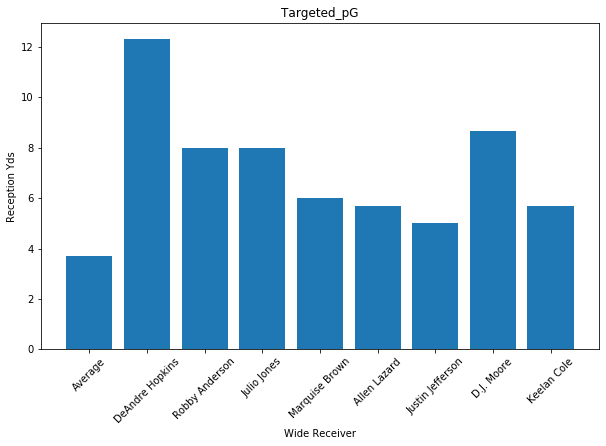

In [126]:
average, hopkins, deandre = print_metric(available_wrs, 'Targeted_pG', 16)
average, anderson, robby = print_metric(available_wrs, 'Targeted_pG', 36)
average, jones, julio = print_metric(available_wrs, 'Targeted_pG', 143)
average, brown, marquise = print_metric(available_wrs, 'Targeted_pG', 158)
average, lazard, allen = print_metric(available_wrs, 'Targeted_pG', 21)
average, jefferson, justin = print_metric(available_wrs, 'Targeted_pG', 46)
average, moore, dj = print_metric(available_wrs, 'Targeted_pG', 108)
average, cole, keelan = print_metric(available_wrs, 'Targeted_pG', 57)

x = ['Average', hopkins, anderson, jones, brown, lazard, jefferson, moore, cole]
y = [average, deandre, robby, julio, marquise, allen, justin, dj, keelan]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.43
DeAndre Hopkins Receptions_pG: 10.67
--------------------------------------------------
Avg Receptions_pG: 2.43
Robby Anderson Receptions_pG: 6.67
--------------------------------------------------
Avg Receptions_pG: 2.43
Julio Jones Receptions_pG: 5.5
--------------------------------------------------
Avg Receptions_pG: 2.43
Marquise Brown Receptions_pG: 4.0
--------------------------------------------------
Avg Receptions_pG: 2.43
Allen Lazard Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 2.43
Justin Jefferson Receptions_pG: 4.0
--------------------------------------------------
Avg Receptions_pG: 2.43
D.J. Moore Receptions_pG: 4.67
--------------------------------------------------
Avg Receptions_pG: 2.43
Keelan Cole Receptions_pG: 5.0
--------------------------------------------------


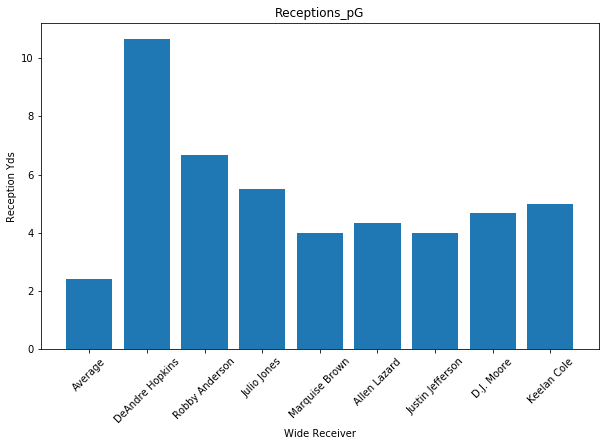

In [127]:
average, hopkins, deandre = print_metric(available_wrs, 'Receptions_pG', 16)
average, anderson, robby = print_metric(available_wrs, 'Receptions_pG', 36)
average, jones, julio = print_metric(available_wrs, 'Receptions_pG', 143)
average, brown, marquise = print_metric(available_wrs, 'Receptions_pG', 158)
average, lazard, allen = print_metric(available_wrs, 'Receptions_pG', 21)
average, jefferson, justin = print_metric(available_wrs, 'Receptions_pG', 46)
average, moore, dj = print_metric(available_wrs, 'Receptions_pG', 108)
average, cole, keelan = print_metric(available_wrs, 'Receptions_pG', 57)

x = ['Average', hopkins, anderson, jones, brown, lazard, jefferson, moore, cole]
y = [average, deandre, robby, julio, marquise, allen, justin, dj, keelan]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Reception Yds')

Avg Catch_Rate: 0.68
DeAndre Hopkins Catch_Rate: 0.86
--------------------------------------------------
Avg Catch_Rate: 0.68
Robby Anderson Catch_Rate: 0.83
--------------------------------------------------
Avg Catch_Rate: 0.68
Julio Jones Catch_Rate: 0.69
--------------------------------------------------
Avg Catch_Rate: 0.68
Marquise Brown Catch_Rate: 0.67
--------------------------------------------------
Avg Catch_Rate: 0.68
Allen Lazard Catch_Rate: 0.76
--------------------------------------------------
Avg Catch_Rate: 0.68
Justin Jefferson Catch_Rate: 0.8
--------------------------------------------------
Avg Catch_Rate: 0.68
D.J. Moore Catch_Rate: 0.54
--------------------------------------------------
Avg Catch_Rate: 0.68
Keelan Cole Catch_Rate: 0.88
--------------------------------------------------


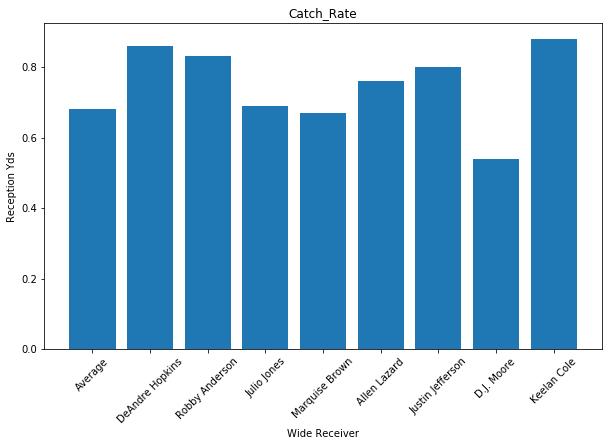

In [128]:
average, hopkins, deandre = print_metric(available_wrs, 'Catch_Rate', 16)
average, anderson, robby = print_metric(available_wrs, 'Catch_Rate', 36)
average, jones, julio = print_metric(available_wrs, 'Catch_Rate', 143)
average, brown, marquise = print_metric(available_wrs, 'Catch_Rate', 158)
average, lazard, allen = print_metric(available_wrs, 'Catch_Rate', 21)
average, jefferson, justin = print_metric(available_wrs, 'Catch_Rate', 46)
average, moore, dj = print_metric(available_wrs, 'Catch_Rate', 108)
average, cole, keelan = print_metric(available_wrs, 'Catch_Rate', 57)

x = ['Average', hopkins, anderson, jones, brown, lazard, jefferson, moore, cole]
y = [average, deandre, robby, julio, marquise, allen, justin, dj, keelan]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Reception Yds')

Avg ReceivingYds_pG: 30.44
DeAndre Hopkins ReceivingYds_pG: 118.67
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Robby Anderson ReceivingYds_pG: 92.67
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Julio Jones ReceivingYds_pG: 90.5
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Marquise Brown ReceivingYds_pG: 52.0
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Allen Lazard ReceivingYds_pG: 84.67
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Justin Jefferson ReceivingYds_pG: 81.67
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
D.J. Moore ReceivingYds_pG: 79.67
--------------------------------------------------
Avg ReceivingYds_pG: 30.44
Keelan Cole ReceivingYds_pG: 49.33
--------------------------------------------------


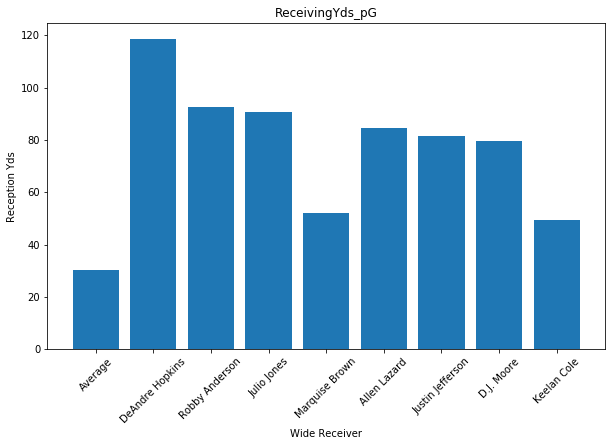

In [117]:
average, hopkins, deandre = print_metric(available_wrs, 'ReceivingYds_pG', 16)
average, anderson, robby = print_metric(available_wrs, 'ReceivingYds_pG', 36)
average, jones, julio = print_metric(available_wrs, 'ReceivingYds_pG', 143)
average, brown, marquise = print_metric(available_wrs, 'ReceivingYds_pG', 158)
average, lazard, allen = print_metric(available_wrs, 'ReceivingYds_pG', 21)
average, jefferson, justin = print_metric(available_wrs, 'ReceivingYds_pG', 46)
average, moore, dj = print_metric(available_wrs, 'ReceivingYds_pG', 108)
average, cole, keelan = print_metric(available_wrs, 'ReceivingYds_pG', 57)

x = ['Average', hopkins, anderson, jones, brown, lazard, jefferson, moore, cole]
y = [average, deandre, robby, julio, marquise, allen, justin, dj, keelan]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Reception Yds')

In [130]:
defense[defense['Team'].isin(['Carolina Panthers', 'Arizona Cardinals', 'Green Bay Packers', 
                              'Washington Football Team', 'Atlanta Falcons', 'Houston Texans', 'Arizona Cardinals', 
                              'Cincinnati Bengals'])]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
7,Arizona Cardinals,64,183,5.50,1004,75,330,4.40,1,97,7.80,60,12.50,752,5,13,4,30.80,2,0,2,11,17.00,4.00,9.00,4.00,21.33,334.67,25.00,110.00,32.33,20.00,0.62,250.67,3.67,5.67
13,Cincinnati Bengals,76,215,5.50,1177,110,545,5.00,5,100,6.50,61,10.70,652,3,10,6,60.00,3,3,0,5,8.00,3.00,-2.00,7.00,25.33,392.33,36.67,181.67,33.33,20.33,0.61,217.33,1.67,2.67
16,Carolina Panthers,83,192,6.00,1147,76,372,4.90,7,114,6.90,80,9.80,786,3,10,7,70.00,6,2,4,2,13.00,-1.00,3.00,11.00,27.67,382.33,25.33,124.00,38.00,26.67,0.70,262.00,0.67,4.33
18,Washington Football Team,84,202,5.00,1003,86,375,4.40,4,103,6.90,66,10.80,712,5,12,7,58.30,4,3,1,13,20.00,15.00,4.00,1.00,28.00,334.33,28.67,125.00,34.33,22.00,0.64,237.33,4.33,6.67
19,Green Bay Packers,85,165,6.60,1086,63,345,5.50,3,94,8.40,68,11.60,791,7,10,7,70.00,3,2,1,8,20.00,5.00,12.00,3.00,28.33,362.00,21.00,115.00,31.33,22.67,0.72,263.67,2.67,6.67
27,Houston Texans,98,208,5.60,1163,109,565,5.20,3,92,7.10,65,10.00,652,6,13,6,46.20,0,0,0,7,5.00,0.00,4.00,1.00,32.67,387.67,36.33,188.33,30.67,21.67,0.71,217.33,2.33,1.67
30,Atlanta Falcons,111,217,6.40,1390,76,339,4.50,5,135,8.10,94,11.60,1088,9,14,11,78.60,5,2,3,6,7.00,-1.00,3.00,5.00,37.00,463.33,25.33,113.00,45.00,31.33,0.70,362.67,2.00,2.33


In [131]:
print('Hopkins vs Carolina Panthers Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 16)
print_metric_team(defense, 'Passing_Att_pG', 16)
print('')
print_metric(wrs, 'Receptions_pG', 16)
print_metric_team(defense, 'Completions_pG', 16)
print('')
print_metric(wrs, 'Catch_Rate', 16)
print_metric_team(defense, 'Completion_Percent_Allowed', 16)
print('')
print_metric(wrs, 'ReceivingYds_pG', 16)
print_metric_team(defense, 'Passing_Yds_pG', 16)

Hopkins vs Carolina Panthers Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
DeAndre Hopkins Targeted_pG: 12.33
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Carolina Panthers Passing_Att_pG: 38.0
--------------------------------------------------

Avg Receptions_pG: 2.98
DeAndre Hopkins Receptions_pG: 10.67
--------------------------------------------------
Avg Completions_pG: 23.05
Carolina Panthers Completions_pG: 26.67
--------------------------------------------------

Avg Catch_Rate: 0.69
DeAndre Hopkins Catch_Rate: 0.86
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Carolina Panthers Completion_Percent_Allowed: 0.7
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
DeAndre Hopkins ReceivingYds_pG: 118.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Carolina Panthers Passing_Yds_pG: 262.0
--------------------------

(258.21, 'Carolina Panthers', 262.0)

In [132]:
print('Anderson vs Arizona Cardinals Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 36)
print_metric_team(defense, 'Passing_Att_pG', 7)
print('')
print_metric(wrs, 'Receptions_pG', 36)
print_metric_team(defense, 'Completions_pG', 7)
print('')
print_metric(wrs, 'Catch_Rate', 36)
print_metric_team(defense, 'Completion_Percent_Allowed', 7)
print('')
print_metric(wrs, 'ReceivingYds_pG', 36)
print_metric_team(defense, 'Passing_Yds_pG', 7)

Anderson vs Arizona Cardinals Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Robby Anderson Targeted_pG: 8.0
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Arizona Cardinals Passing_Att_pG: 32.33
--------------------------------------------------

Avg Receptions_pG: 2.98
Robby Anderson Receptions_pG: 6.67
--------------------------------------------------
Avg Completions_pG: 23.05
Arizona Cardinals Completions_pG: 20.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Robby Anderson Catch_Rate: 0.83
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Arizona Cardinals Completion_Percent_Allowed: 0.62
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Robby Anderson ReceivingYds_pG: 92.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Arizona Cardinals Passing_Yds_pG: 250.67
-------------------------------

(258.21, 'Arizona Cardinals', 250.67)

In [133]:
print('Jones vs Green Bay Packers Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 143)
print_metric_team(defense, 'Passing_Att_pG', 19)
print('')
print_metric(wrs, 'Receptions_pG', 143)
print_metric_team(defense, 'Completions_pG', 19)
print('')
print_metric(wrs, 'Catch_Rate', 143)
print_metric_team(defense, 'Completion_Percent_Allowed', 19)
print('')
print_metric(wrs, 'ReceivingYds_pG', 143)
print_metric_team(defense, 'Passing_Yds_pG', 19)

Jones vs Green Bay Packers Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Julio Jones Targeted_pG: 8.0
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Green Bay Packers Passing_Att_pG: 31.33
--------------------------------------------------

Avg Receptions_pG: 2.98
Julio Jones Receptions_pG: 5.5
--------------------------------------------------
Avg Completions_pG: 23.05
Green Bay Packers Completions_pG: 22.67
--------------------------------------------------

Avg Catch_Rate: 0.69
Julio Jones Catch_Rate: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Green Bay Packers Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Julio Jones ReceivingYds_pG: 90.5
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Green Bay Packers Passing_Yds_pG: 263.67
-----------------------------------------------

(258.21, 'Green Bay Packers', 263.67)

In [134]:
print('Brown vs Washington Football Team Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 158)
print_metric_team(defense, 'Passing_Att_pG', 18)
print('')
print_metric(wrs, 'Receptions_pG', 158)
print_metric_team(defense, 'Completions_pG', 18)
print('')
print_metric(wrs, 'Catch_Rate', 158)
print_metric_team(defense, 'Completion_Percent_Allowed', 18)
print('')
print_metric(wrs, 'ReceivingYds_pG', 158)
print_metric_team(defense, 'Passing_Yds_pG', 18)

Brown vs Washington Football Team Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Marquise Brown Targeted_pG: 6.0
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Washington Football Team Passing_Att_pG: 34.33
--------------------------------------------------

Avg Receptions_pG: 2.98
Marquise Brown Receptions_pG: 4.0
--------------------------------------------------
Avg Completions_pG: 23.05
Washington Football Team Completions_pG: 22.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Marquise Brown Catch_Rate: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Washington Football Team Completion_Percent_Allowed: 0.64
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Marquise Brown ReceivingYds_pG: 52.0
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Washington Football Team Passing_Yds_pG: 237.33
-

(258.21, 'Washington Football Team', 237.33)

In [135]:
print('Lazard vs Atlanta Falcons Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 21)
print_metric_team(defense, 'Passing_Att_pG', 30)
print('')
print_metric(wrs, 'Receptions_pG', 21)
print_metric_team(defense, 'Completions_pG', 30)
print('')
print_metric(wrs, 'Catch_Rate', 21)
print_metric_team(defense, 'Completion_Percent_Allowed', 30)
print('')
print_metric(wrs, 'ReceivingYds_pG', 21)
print_metric_team(defense, 'Passing_Yds_pG', 30)

Lazard vs Atlanta Falcons Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Allen Lazard Targeted_pG: 5.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Atlanta Falcons Passing_Att_pG: 45.0
--------------------------------------------------

Avg Receptions_pG: 2.98
Allen Lazard Receptions_pG: 4.33
--------------------------------------------------
Avg Completions_pG: 23.05
Atlanta Falcons Completions_pG: 31.33
--------------------------------------------------

Avg Catch_Rate: 0.69
Allen Lazard Catch_Rate: 0.76
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Atlanta Falcons Completion_Percent_Allowed: 0.7
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Allen Lazard ReceivingYds_pG: 84.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Atlanta Falcons Passing_Yds_pG: 362.67
--------------------------------------------------


(258.21, 'Atlanta Falcons', 362.67)

In [136]:
print('Jefferson vs Carolina Panthers Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 46)
print_metric_team(defense, 'Passing_Att_pG', 27)
print('')
print_metric(wrs, 'Receptions_pG', 46)
print_metric_team(defense, 'Completions_pG', 27)
print('')
print_metric(wrs, 'Catch_Rate', 46)
print_metric_team(defense, 'Completion_Percent_Allowed', 27)
print('')
print_metric(wrs, 'ReceivingYds_pG', 46)
print_metric_team(defense, 'Passing_Yds_pG', 27)

Jefferson vs Carolina Panthers Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Justin Jefferson Targeted_pG: 5.0
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Houston Texans Passing_Att_pG: 30.67
--------------------------------------------------

Avg Receptions_pG: 2.98
Justin Jefferson Receptions_pG: 4.0
--------------------------------------------------
Avg Completions_pG: 23.05
Houston Texans Completions_pG: 21.67
--------------------------------------------------

Avg Catch_Rate: 0.69
Justin Jefferson Catch_Rate: 0.8
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Houston Texans Completion_Percent_Allowed: 0.71
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Justin Jefferson ReceivingYds_pG: 81.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Houston Texans Passing_Yds_pG: 217.33
-----------------------------------

(258.21, 'Houston Texans', 217.33)

In [137]:
print('Moore vs Arizona Cardinals Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 108)
print_metric_team(defense, 'Passing_Att_pG', 7)
print('')
print_metric(wrs, 'Receptions_pG', 108)
print_metric_team(defense, 'Completions_pG', 7)
print('')
print_metric(wrs, 'Catch_Rate', 108)
print_metric_team(defense, 'Completion_Percent_Allowed', 7)
print('')
print_metric(wrs, 'ReceivingYds_pG', 108)
print_metric_team(defense, 'Passing_Yds_pG', 7)

Moore vs Arizona Cardinals Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
D.J. Moore Targeted_pG: 8.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Arizona Cardinals Passing_Att_pG: 32.33
--------------------------------------------------

Avg Receptions_pG: 2.98
D.J. Moore Receptions_pG: 4.67
--------------------------------------------------
Avg Completions_pG: 23.05
Arizona Cardinals Completions_pG: 20.0
--------------------------------------------------

Avg Catch_Rate: 0.69
D.J. Moore Catch_Rate: 0.54
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Arizona Cardinals Completion_Percent_Allowed: 0.62
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
D.J. Moore ReceivingYds_pG: 79.67
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Arizona Cardinals Passing_Yds_pG: 250.67
-------------------------------------------------

(258.21, 'Arizona Cardinals', 250.67)

In [138]:
print('Cole vs Cincinnati Bengals Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', 57)
print_metric_team(defense, 'Passing_Att_pG', 13)
print('')
print_metric(wrs, 'Receptions_pG', 57)
print_metric_team(defense, 'Completions_pG', 13)
print('')
print_metric(wrs, 'Catch_Rate', 57)
print_metric_team(defense, 'Completion_Percent_Allowed', 13)
print('')
print_metric(wrs, 'ReceivingYds_pG', 57)
print_metric_team(defense, 'Passing_Yds_pG', 13)

Cole vs Cincinnati Bengals Summary:
--------------------------------------------------

Avg Targeted_pG: 4.49
Keelan Cole Targeted_pG: 5.67
--------------------------------------------------
Avg Passing_Att_pG: 34.71
Cincinnati Bengals Passing_Att_pG: 33.33
--------------------------------------------------

Avg Receptions_pG: 2.98
Keelan Cole Receptions_pG: 5.0
--------------------------------------------------
Avg Completions_pG: 23.05
Cincinnati Bengals Completions_pG: 20.33
--------------------------------------------------

Avg Catch_Rate: 0.69
Keelan Cole Catch_Rate: 0.88
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Cincinnati Bengals Completion_Percent_Allowed: 0.61
--------------------------------------------------

Avg ReceivingYds_pG: 38.03
Keelan Cole ReceivingYds_pG: 49.33
--------------------------------------------------
Avg Passing_Yds_pG: 258.21
Cincinnati Bengals Passing_Yds_pG: 217.33
-----------------------------------------

(258.21, 'Cincinnati Bengals', 217.33)

In terms of my current roster, Brown isn't keeping up. Lazard is becoming a bigger part of the Green Bay offense. He has a good catch rate and last week had a long catch of 72 yards.

## Defense

In [139]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [146]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
Team,,,,,,,,,,,,,,,,,,,,,,
ARI,75,113,786,4,5,95,449,5,104,75,786,4,3,0,9,257.40,25.00,37.67,0.66,262.00,149.67,3.00
ATL,80,129,961,7,2,79,327,3,126,80,961,7,0,0,10,293.20,26.67,43.00,0.62,320.33,109.00,3.33
BAL,54,78,585,5,0,88,499,3,75,54,585,5,5,2,9,228.80,18.00,26.00,0.69,195.00,166.33,3.00
BUF,81,114,1038,10,1,76,311,2,112,81,1038,10,4,4,12,319.90,27.00,38.00,0.71,346.00,103.67,4.00
CAR,77,104,871,2,2,74,296,4,102,77,871,2,3,2,6,232.00,25.67,34.67,0.74,290.33,98.67,2.00


In [141]:
per_week(ttl_offense, 'CompletedPasses', no_games)
per_week(ttl_offense, 'PassesAttempted', no_games)
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week(ttl_offense, 'PassingYds', no_games)
per_week(ttl_offense, 'RushingYds', no_games)
per_week(ttl_offense, 'TtlTDs', no_games)

In [142]:
defense[defense['Team'] == 'Chicago Bears']

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
8,Chicago Bears,65,199,5.50,1092,72,357,5.00,4,120,6.50,68,11.40,776,2,12,5,41.70,4,3,1,7,19.00,3.00,12.00,4.00,21.67,364.00,24.00,119.00,40.00,22.67,0.57,258.67,2.33,6.33


In [148]:
ttl_offense.reset_index(inplace=True)

In [149]:
ttl_offense[ttl_offense['Team'] == 'IND']

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
13,IND,74,96,811,3,3,93,358,3,95,74,811,3,1,0,6,231.40,24.67,32.00,0.77,270.33,119.33,2.00


The Bears have a good defense, that's for sure. But they're going up against the Colts. The Colts have completed almost 25 of their 32 passes on average, a 77% completion rate. The Bears have only allowed teams so far to complete 57% of their passes. The real problem is that the Bears while breaking up a whole bunch of passes have still allowed 260 passing yards in a game. I think Chicago is going to have a hard time with the Colts so I want to see what other team matchups are out there that could be more fruitful.

In [150]:
taken_def = ['Indianapolis Colts', 'Baltimore Ravens', 'Tampa Bay Buccaneers', 'Pittsburgh Steelers', 
             'San Francisco 49ers', 'Kansas City Chiefs', 'Los Angeles Chargers', 'Buffalo Bills', 
             'Los Angeles Rams']

In [151]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [152]:
available_def

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
7,Arizona Cardinals,64,183,5.50,1004,75,330,4.40,1,97,7.80,60,12.50,752,5,13,4,30.80,2,0,2,11,17.00,4.00,9.00,4.00,21.33,334.67,25.00,110.00,32.33,20.00,0.62,250.67,3.67,5.67
8,Chicago Bears,65,199,5.50,1092,72,357,5.00,4,120,6.50,68,11.40,776,2,12,5,41.70,4,3,1,7,19.00,3.00,12.00,4.00,21.67,364.00,24.00,119.00,40.00,22.67,0.57,258.67,2.33,6.33
9,Miami Dolphins,66,185,6.50,1198,82,401,4.90,5,96,8.80,69,12.20,845,4,8,7,87.50,4,1,3,7,16.00,2.00,2.00,12.00,22.00,399.33,27.33,133.67,32.00,23.00,0.72,281.67,2.33,5.33
10,New England Patriots,68,174,6.20,1073,79,367,4.60,1,90,8.20,65,11.40,740,7,9,5,55.60,7,4,3,5,32.00,11.00,6.00,15.00,22.67,357.67,26.33,122.33,30.00,21.67,0.72,246.67,1.67,10.67
11,Denver Broncos,73,207,5.50,1140,81,307,3.80,1,122,7.00,83,10.30,857,7,10,6,60.00,2,1,1,4,8.00,2.00,5.00,1.00,24.33,380.00,27.00,102.33,40.67,27.67,0.68,285.67,1.33,2.67
13,Cincinnati Bengals,76,215,5.50,1177,110,545,5.00,5,100,6.50,61,10.70,652,3,10,6,60.00,3,3,0,5,8.00,3.00,-2.00,7.00,25.33,392.33,36.67,181.67,33.33,20.33,0.61,217.33,1.67,2.67
14,Tennessee Titans,77,195,6.50,1267,86,498,5.80,3,105,7.70,68,11.90,806,7,10,8,80.00,6,4,2,4,15.00,3.00,5.00,7.00,25.67,422.33,28.67,166.00,35.00,22.67,0.65,268.67,1.33,5.00
16,Carolina Panthers,83,192,6.00,1147,76,372,4.90,7,114,6.90,80,9.80,786,3,10,7,70.00,6,2,4,2,13.00,-1.00,3.00,11.00,27.67,382.33,25.33,124.00,38.00,26.67,0.70,262.00,0.67,4.33
17,New York Giants,83,201,5.30,1073,97,369,3.80,3,96,7.90,64,11.90,762,6,12,8,66.70,3,2,1,8,11.00,4.00,9.00,-2.00,27.67,357.67,32.33,123.00,32.00,21.33,0.67,254.00,2.67,3.67
18,Washington Football Team,84,202,5.00,1003,86,375,4.40,4,103,6.90,66,10.80,712,5,12,7,58.30,4,3,1,13,20.00,15.00,4.00,1.00,28.00,334.33,28.67,125.00,34.33,22.00,0.64,237.33,4.33,6.67


In [157]:
ttl_offense[ttl_offense['FDFantasyPts'] < ttl_offense['FDFantasyPts'].mean()*.8]

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
23,NYG,68,113,699,2,4,53,170,1,106,68,699,2,5,3,3,164.90,22.67,37.67,0.60,233.00,56.67,1.00
24,NYJ,59,96,562,3,4,73,265,1,91,59,562,3,1,1,4,164.70,19.67,32.00,0.61,187.33,88.33,1.33
31,WAS,57,101,625,4,3,81,300,4,99,57,625,4,8,4,8,199.00,19.00,33.67,0.56,208.33,100.00,2.67


In [160]:
ttl_offense[ttl_offense['PassingYds'] < ttl_offense['PassingYds'].mean()*.8]

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
2,BAL,54,78,585,5,0,88,499,3,75,54,585,5,5,2,9,228.80,18.00,26.00,0.69,195.00,166.33,3.00
7,CLE,53,85,564,5,2,98,513,5,78,53,564,5,2,1,10,232.80,17.67,28.33,0.62,188.00,171.00,3.33
20,MIN,46,78,623,5,6,73,440,4,73,46,623,5,2,1,9,230.20,15.33,26.00,0.59,207.67,146.67,3.00
24,NYJ,59,96,562,3,4,73,265,1,91,59,562,3,1,1,4,164.70,19.67,32.00,0.61,187.33,88.33,1.33
31,WAS,57,101,625,4,3,81,300,4,99,57,625,4,8,4,8,199.00,19.00,33.67,0.56,208.33,100.00,2.67


In [161]:
ttl_offense[ttl_offense['RushingYds'] < ttl_offense['RushingYds'].mean()*.8]

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
6,CIN,91,141,821,5,1,70,238,1,136,91,821,5,4,2,6,235.20,30.33,47.00,0.65,273.67,79.33,2.00
9,DEN,58,102,668,4,2,65,253,1,108,66,721,4,5,2,5,201.30,19.33,34.00,0.57,222.67,84.33,1.67
12,HOU,64,95,792,4,3,54,198,3,92,64,792,4,1,1,7,215.70,21.33,31.67,0.67,264.00,66.00,2.33
23,NYG,68,113,699,2,4,53,170,1,106,68,699,2,5,3,3,164.90,22.67,37.67,0.60,233.00,56.67,1.00
24,NYJ,59,96,562,3,4,73,265,1,91,59,562,3,1,1,4,164.70,19.67,32.00,0.61,187.33,88.33,1.33
29,TAM,71,109,753,6,3,73,276,4,105,71,753,6,3,1,10,247.50,23.67,36.33,0.65,251.00,92.00,3.33


In [164]:
ttl_offense[ttl_offense['Interceptions'] > ttl_offense['Interceptions'].mean()*1.5]

,Team,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,RushingYds_pG,TtlTDs_pG
0,ARI,75,113,786,4,5,95,449,5,104,75,786,4,3,0,9,257.40,25.00,37.67,0.66,262.00,149.67,3.00
5,CHI,67,115,748,9,4,85,414,0,112,66,744,9,4,0,9,264.70,22.33,38.33,0.58,249.33,138.00,3.00
20,MIN,46,78,623,5,6,73,440,4,73,46,623,5,2,1,9,230.20,15.33,26.00,0.59,207.67,146.67,3.00
23,NYG,68,113,699,2,4,53,170,1,106,68,699,2,5,3,3,164.90,22.67,37.67,0.60,233.00,56.67,1.00
24,NYJ,59,96,562,3,4,73,265,1,91,59,562,3,1,1,4,164.70,19.67,32.00,0.61,187.33,88.33,1.33
25,PHI,79,132,737,3,6,79,353,3,127,79,737,3,6,2,6,216.00,26.33,44.00,0.60,245.67,117.67,2.00


Only one thing holds true on all of these lists, the New York Jets. My team. They just don't have anything going right now. I'm officially being that person and I'm going to take the Broncos this week as my Defense to captilize on the Jets' misfortune.